In [4]:
import numpy as np 
import pandas as pd

In [5]:
print("Hello World")

Hello World


In [7]:
df = pd.read_csv("spam.csv", encoding="latin1")

In [8]:
df.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
# So, we see that in columns Unnamed:2,Unnamed:3, Unnamed:4 has very less values so we should drop these columns

df.drop(columns=['Unnamed: 2', "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [15]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# now we can rename the column names

df.rename(columns={"v1":"target","v2":"sms"}, inplace=True)

In [17]:
df.head(5)

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# now we need numbers in target value so for this we can use label encoder

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

df['target'] =  en.fit_transform(df['target'])

In [22]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# Checking for missing values

df.isnull().sum()

target    0
sms       0
dtype: int64

In [24]:
# So there are no missing values now what about duplicate values. We can check the duplicate values as
df.duplicated().sum()

np.int64(403)

In [25]:
# So there are 403 duplicate values and we need to remove them

df = df.drop_duplicates(keep="first")

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.shape

(5169, 2)

In [28]:
# Now our data cleaning part is done 

# Now its time for EDA

In [29]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

In [31]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1dd5a1763c0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

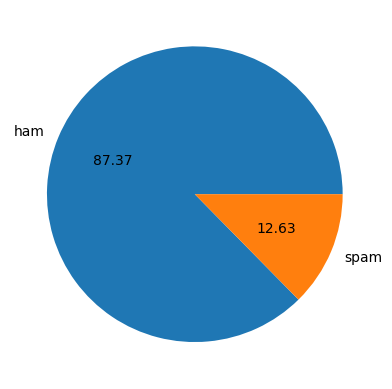

In [32]:
# Using a piechart

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')

In [33]:
# This shows that our data is imbalanced

In [39]:
import nltk

In [40]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import nltk

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
df['sms']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5169, dtype: object

In [46]:
df['num_characters']=df['sms'].apply(len)

C:\Users\User\AppData\Local\Temp\ipykernel_50016\4217142489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['sms'].apply(len)


In [47]:
df.head()

,target,sms,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
# Counting the no of words
# First we word tokenize each sms message i.e separate the sms message using words
# Then we get a list of words
# Now we can count the length of the list to count the no of words

In [49]:
df['sms'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: sms, Length: 5169, dtype: object

In [53]:
# Now I can count the length of the list and add it to a new column num_words

df["num_words"] = df["sms"].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\User\AppData\Local\Temp\ipykernel_50016\2547398821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"] = df["sms"].apply(lambda x: len(nltk.word_tokenize(x)))


In [54]:
df.head()

,target,sms,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [55]:
df["sms"].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: sms, Length: 5169, dtype: object

In [56]:
df['num_sentences'] = df["sms"].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\User\AppData\Local\Temp\ipykernel_50016\1625512407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df["sms"].apply(lambda x: len(nltk.sent_tokenize(x)))


In [57]:
df.head()

,target,sms,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [58]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [59]:
# Comparing non-spam(ham) messages and spam messsages

In [60]:
# ham message

df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
# spam messages

df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [63]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

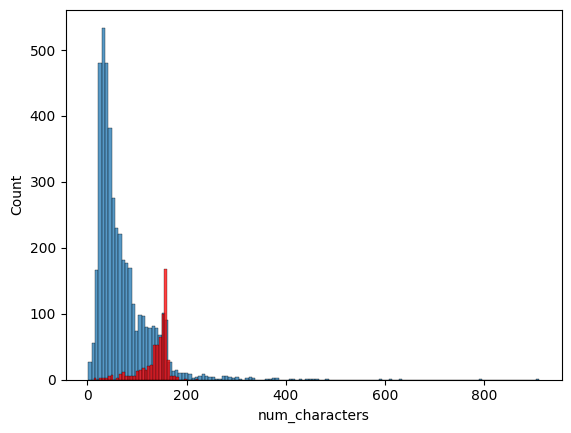

In [65]:
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"], color="red")


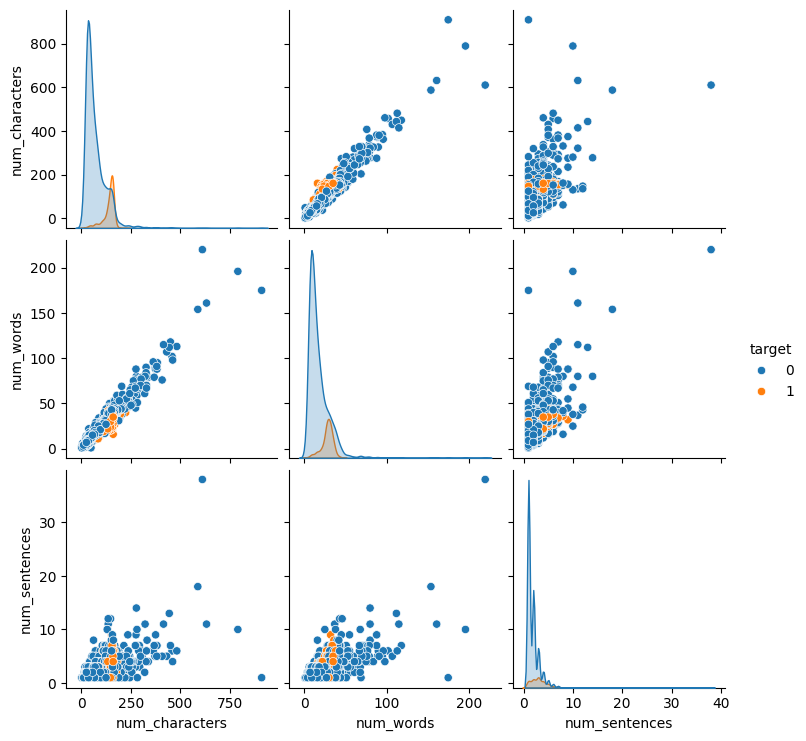

In [66]:
sns.pairplot(df, hue='target')

<Axes: >

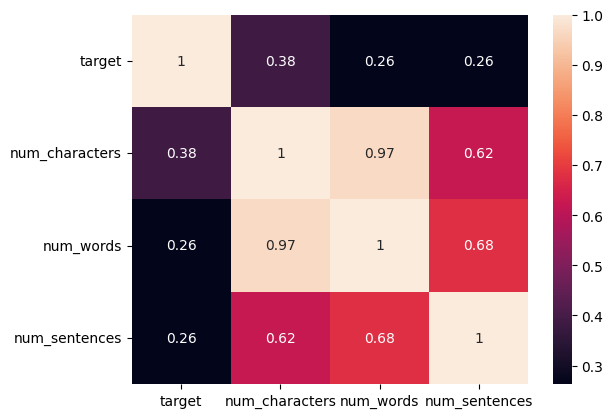

In [69]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [96]:
# target sanga num_characters ko sab se badhi correlation cha so we use num_characters


In [107]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [116]:
import nltk
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower() # Converting into lowercase
    
    
    # Converting into tokens using nltk
    text = nltk.word_tokenize(text)
    y = []
    for items in text:
        if items.isalnum():
            y.append(items)

    text = y[:]  # List Cloning 
    y.clear()

    # Removing stop words and punctuation

    for items in text:
        if items not in stopwords.words('english') and items not in string.punctuation:
            y.append(items)

    text = y[:]
    y.clear()

    # Stemming 
    for items in text:
        y.append(ps.stem(items))
            
    return " ".join(y)

In [117]:
transform_text("Now I am dancing heyeyeyey dancing")

'danc heyeyeyey danc'

In [118]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dances')

'danc'

In [119]:
df["sms"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [120]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [121]:
df['sms'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: sms, Length: 5169, dtype: object

In [122]:
df['transformed_text'] = df['sms'].apply(transform_text)

C:\Users\User\AppData\Local\Temp\ipykernel_50016\1005002151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['sms'].apply(transform_text)


In [123]:
df

,target,sms,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [124]:
df.head()

,target,sms,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [127]:
%pip install wordcloud


  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [135]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [136]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

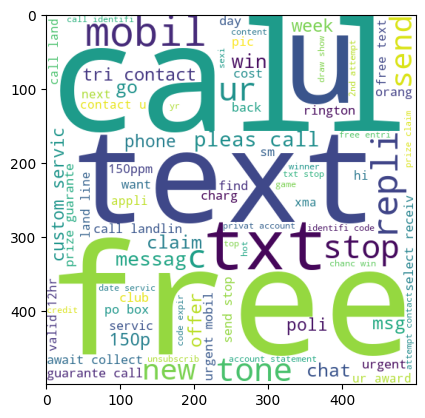

In [137]:
plt.imshow(spam_wc)

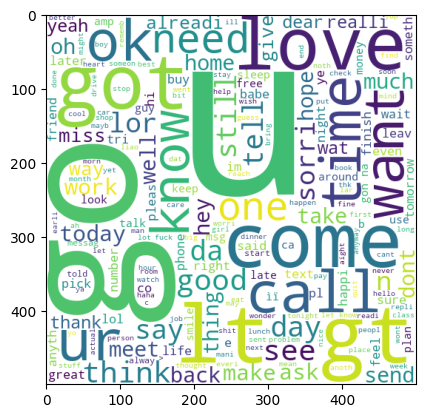

In [138]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [139]:
# We can also perform other EDAs too

In [140]:
# Model Building

In [162]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [163]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [166]:
X = tf.fit_transform(df["transformed_text"]).toarray()

In [167]:
X.shape

(5169, 6708)

In [168]:
y = df['target'].values

In [169]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [174]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [175]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_gnb))
print("Precision :", precision_score(y_test, y_pred_gnb))



Accuracy: 0.8636363636363636
Confusion Matrix: [[772 117]
 [ 24 121]]
Precision : 0.5084033613445378


In [176]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_mnb))
print("Precision :", precision_score(y_test, y_pred_mnb))



Accuracy: 0.9613152804642167
Confusion Matrix: [[888   1]
 [ 39 106]]
Precision : 0.9906542056074766


In [177]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_bnb))
print("Precision :", precision_score(y_test, y_pred_bnb))



Accuracy: 0.9661508704061895
Confusion Matrix: [[885   4]
 [ 31 114]]
Precision : 0.9661016949152542


In [180]:
# So, BernoulliNB() is the best here
# Precision Score matters the most 

# If we use TfidfVectorizer() then MNB is performing well
# So, we use MultinomialNB()

In [181]:
# We can check which model is best after learning all other models and also learn about voting classifier

In [182]:
import pickle
pickle.dump(tf, open("vectorizer.pkl","wb"))
pickle.dump(mnb, open("model.pkl","wb"))
